<a href="https://colab.research.google.com/github/brunobf09/Machine-Learning-na-Guerra-Moderna/blob/main/%5BARTIGO%5DComo%20destruir%20uma%20base%20militar%20utilizando%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como destruir uma base militar utilizando Machine Learning.
##Aplicação de algoritmos de classificação Naive Bayes e Análise Discriminante Quadrática na Guerra Moderna.
### Por: *Bruno Brasil*

<img src='https://prd-sc101-cdn.rtx.com/-/media/ris/what-we-do/air-dominance/electronic-warfare/ngj/2020-02/images/ngj_hero.jpg?rev=264ff6fa1bfc4d0d887431de88f801ec' width=100%>

Devido aos conflitos recentes, conceitos como o da Guerra Eletrônica ganham destaque em discussões a respeito das estratégias militares na tomada ou na defesa territorial. O ato de um soldado ucraniano ligar o seu telefone celular pode atrair uma chuva de estilhaços de fogo, ocasionado por radares de artilharia e controles remotos de veículos aéreos não tripulados.

A Guerra Eletrônica (GE) é o conjunto de ações envolvendo o uso do espectro eletromagnético ou de energia dirigida para aumentar as capacidades de uma força armada, aprimorar a consciência situacional no Teatro de Operações e obter efeitos ofensivos e defensivos. Essa tecnologia é usualmente utilizada por artilharias, caças, mísseis de cruzeiro, drones e entre outros meios para garantir ou impedir o emprego hostil de uma determinada força militar. 

E como que a GE pode está ligada com o Aprendizado de Máquinas (ML)? 

A *Defense Brief Editorial* divulgou em abril de 2020 que a empresa de tecnologia alemã, *Hensoldt*, concluiu o desenvolvimento de um novo sistema modular de combate eletrônico aerotransportado baseado em Inteligência Artificial (IA).

*Kalætron Attack*, nome dado ao sistema, neutraliza os radares de controle de fogo do inimigo em diferentes distâncias, permitindo que ataques possam ser deferidos diretamente a um alvo de interesse.

O sistema utiliza *hardware* digitalizado e inteligência artificial para detectar ameaças baseadas em radar às forças aéreas em tempo recorde e neutralizá-las com contramedidas eletrônicas direcionadas.

*Hensoldt* explica que o design digital permite que o *Kalætron Attack* detecte e identifique posições de defesa aérea muito rapidamente em uma ampla faixa de frequência. A unidade usa técnicas de IA para reconhecer novos padrões de ameaças de um conjunto de pulsos coletados. Isso é especialmente importante para identificar os mais recentes sistemas de radar de defesa aérea que cobrem uma faixa de frequência extremamente ampla ou saltam entre frequências específicas em frações de segundo.

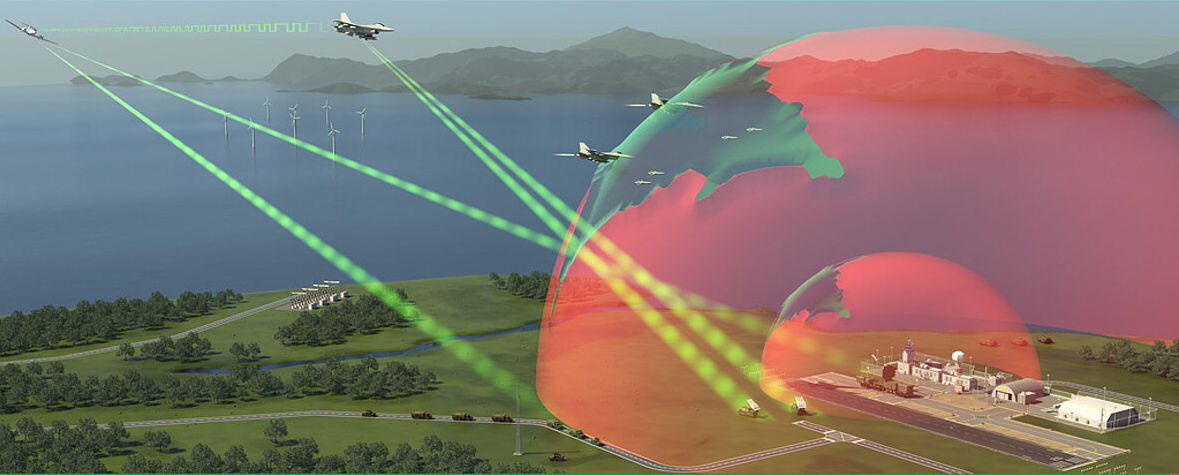

Aproveitando o contexto mencionado, o objetivo deste artigo é apresentar os conceitos e a aplicação das técnicas de *Machine Learning* baseadas nos modelos de *Naive Bayes* (NB) e de Análise Discriminante Quadrática (QDA) de forma a descrever o comportamento do sistema do *Kalætron Attack*.

Os modelos de classificação baseados em NB e QDA foram escolhidos pelo autor por serem modelos de fácil construção, de rápida solução e sem a necessidades de inserir hiperparâmetros, porém o leitor pode reproduzir o estudo com qualquer outro modelo.

##Naive Bayes  (NB)

O algoritmo *Naive Bayes* é utilizado no aprendizado de máquinas supervisionado, baseado no Teorema de Bayes (proposto por Thomas Bayes) que tem como objetivo encontrar a probabilidade a *Posteriori*, probabilidade condicionada que é atribuída a partir da análise dos eventos passados.

O classificador *bayesiano* simplifica o aprendizado assumindo que os atributos são independentes. Embora a independência seja geralmente uma suposição, na prática, o *Naive Bayes* compete bem contra classificadores mais sofisticados e é atualmente utilizado em classificação de texto, diagnóstico médico e sistemas de gerenciamento de desempenho.

Seu algoritimo é baseada na equação proposta por Bayes:

$P(W|x) = \frac{P(W)P(x|w)}{P(x)}$

Portanto, para determinar a hipótese máxima da probabilidade *posteriori* (MAP) de um determinado evento, basta aplicar a seguinte equação:

$h_{MAP}(x) = \underset{i}{argmax} \  P(W_{i})P(x|w_{i})$

Logo, para um classificador de duas classe, se $P(W_{1}|x)> P(W_{2}|x)$ for verdadeiro, então a observação será classificada como $w_{1}$, caso contrário, será classificada como $w_{2}$.

##Análise Discriminante Quadrática (QDA)

O classificador DA foi introduzido por R. Fisher e foi
usado em muitos problemas de classificação por ser básicos e simples de implementar. Existem dois tipos de classificador DA,
o classificador baseado em análise discriminante linear (LDA) e o baseado em análise discriminante quadrática (QDA). Para o nosso estudo, vamos focar na QDA.

A QDA nada mais é que um modelo matemático que utiliza funções discriminantes para determinar os limites de decisão e regiões para cada classe de forma não-linear.

Essas funções descriminates seguem o mesmo princípio do teorema de Bayes e comumente assume que ${P(x|w)}$ é proveniente de uma distribuição normal, logo:

${P(x|w)} =  N(\mu_{i},\sum_{i}) = \frac{1}{\sqrt{(2\pi)^m|\sum_{i}|}}exp(-\frac{1}{2}(x-\mu_{i})^T\sum_{i}^{-1}(x-\mu_{i}))$

onde, $\mu_{i}$ representa a média e $\sum_{i}$ a matriz de covariância da i-ésima classe, $|\sum_{i}|$ e $\sum_{i}^{-1}$ a determinante e a inversa da matriz de covariância, respectivamente, e $m$ o número de atributos ou o número de variáveis ​​de uma amostra (x).

Dessa forma, para chegar à borda de decisão e a região de duas classes, podemos resumir as equações da seguinte forma:

$S_{12} = f_{1} - f_{2} = \frac{P(w_{1}|x)}{P(w_{2}|x)} = x^TWx + w^Tx+W_{0}$

onde,

$W = -\frac{1}{2}(\sum_{1}^{-1} - \sum_{2}^{-1})$

$w =  \mu_{1}^T \sum_{1}^{-1} - \mu_{2}^T \sum_{2}^{-1}$

$W_{0}= -0.5(\mu_{1}^T \sum_{1}^{-1}\mu_{1} -\mu_{2}^T \sum_{2}^{-1}\mu_{2} + ln|\sum_{1}| - ln|\sum_{2}| + ln \frac{P(w_{1})}{P(w_{2})}$

Assim, temos que $sgn(S_{12}(x)) = \left \{ \begin{matrix} x\ \varepsilon \ w_{1}, & \mbox{se } S_{12}>0 \\ \mbox{Borda de Decisão}, & \mbox{se } S_{12}=0 \\  x\ \varepsilon \ w_{2}, & \mbox{se } S_{12}<0 \end{matrix} \right.$


O processo descrito acima pode ser resumido, conforme a figura abaixo:

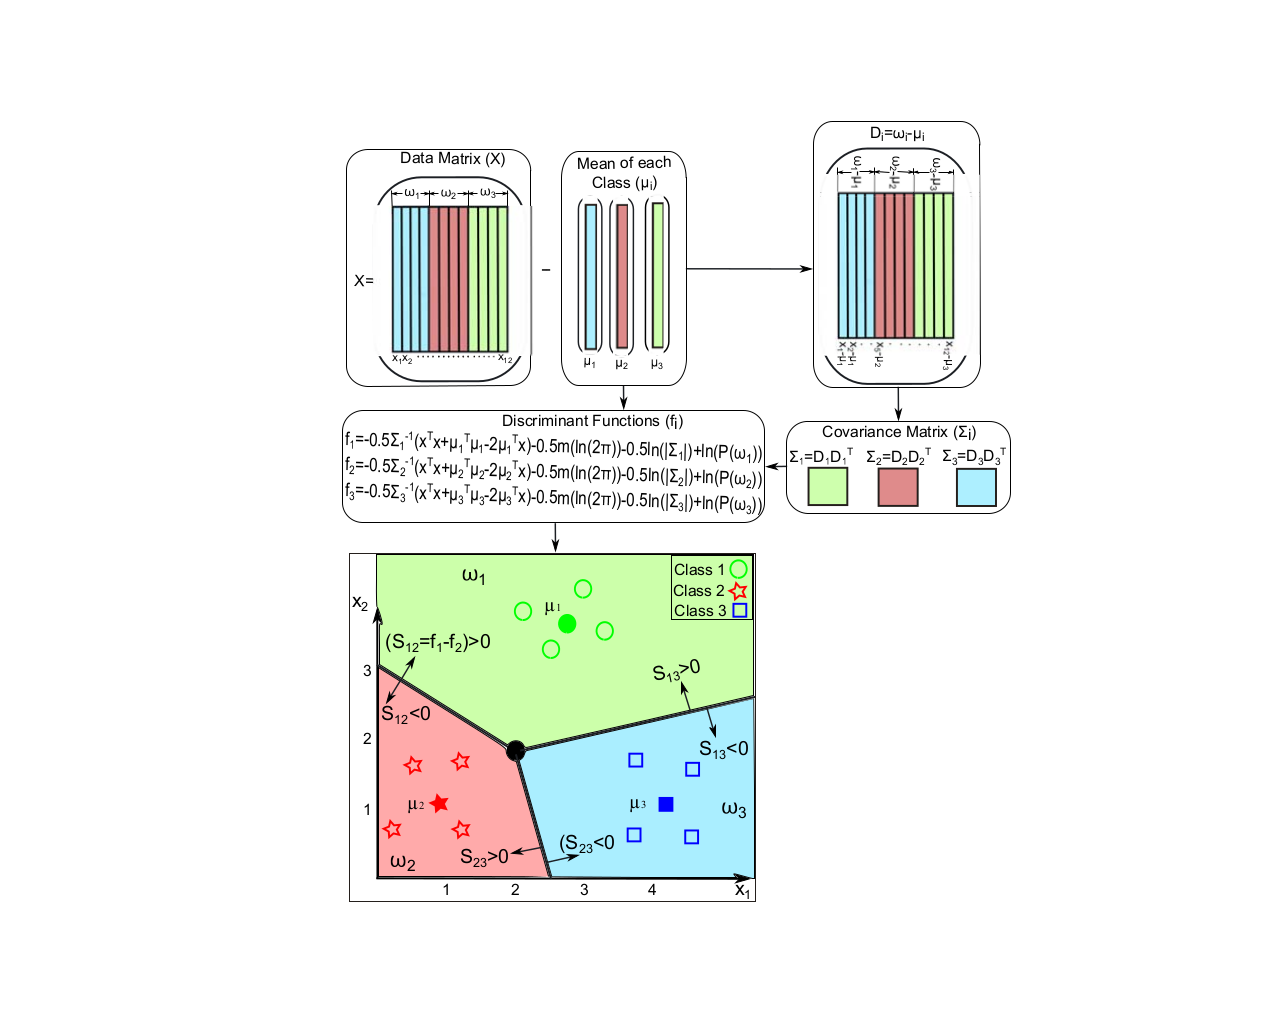

Não se preocupe com as fórmulas matemáticas, a biblioteca scikit-learn torna tudo isso mais fácil.

# Metodologia


Após o entendimento dos conceitos fundamentais que dão suporte a este artigo, será utilizada a metodologia de construção de modelos de *Machine Learning* utilizando softwares de linguagem de programação em Python da seguinte forma:

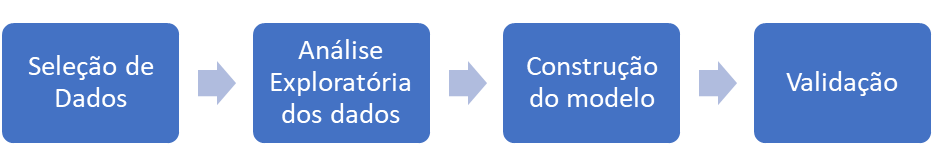

O primeiro processo será o de seleção de dados com base nas caractéricas descritas no *Defense Brief Editorial* sobre o *Kalætron Attack*. Após, será feita uma análise exploratória dos dados para entender o comportamento das variáveis preditivas, e em seguida serão construídos dois modelos de *Machine Learning* frente aos dados de treino, um baseado no algorítimo do Naive Bayes e outro da Análise Discriminante Quadrática. Por fim, o modelo que apresentar melhor resultado será validado pelo o conjunto de teste.

## Seleção de dados

O *dataset* selecionado possui 2000 registros de emissões eletromagnéticas, dividido em 3 variáveis, sendo elas, duas variáveis preditivas e uma variável alvo:

Variável Alvo: Definido por "A" e "E".

Onde a classe "A" representa radares de Defesa Aérea, uma ameça iminente e que precisam ser neutralizada, e a classe "E" que representa radares de Vigilância Aérea, e assim, não oferece uma ameça direta.

Variáveis preditivas:
- FREQ: Frequência de ondas em MHz. 
- PRF: Frequência de repetição de pulsos em PPS.

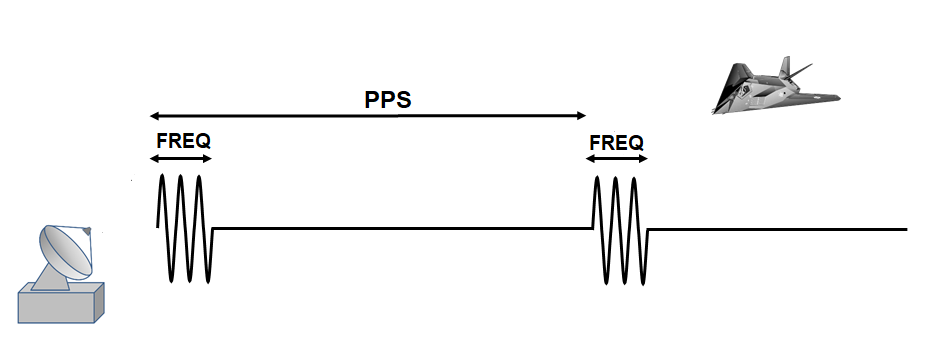

O modelo proposto visa classificar, a partir das variáveis FREQ e PRF, se a emissão eletromagética é uma possível ameaça que precisa ser neutralizada. Abaixo segue a visualização do banco de dados.

In [8]:
#Importando libs e dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")
#Carregando dados
data = pd.read_csv("DADOS.csv",sep=';')
data

,CLASSE,FREQ,PRF
0,A,2179,282
1,A,2237,284
2,A,2240,286
3,A,2255,215
4,A,2290,269
...,...,...,...
1995,E,3709,329
1996,E,3698,331
1997,E,3949,335
1998,E,4011,391


A intenção deste artigo não é demonstrar técnicas de pré-processamento dos dados, assim, essa etapa foi realizada previamente. Desta forma, o *dataset*  em questão, está balanceado e ausente de valores nulos.

## Análise Exploratória dos Dados

A visualização gráfica abaixo contribui para que seja analisado o comportamento das classes em relação as variáveis preditivas.

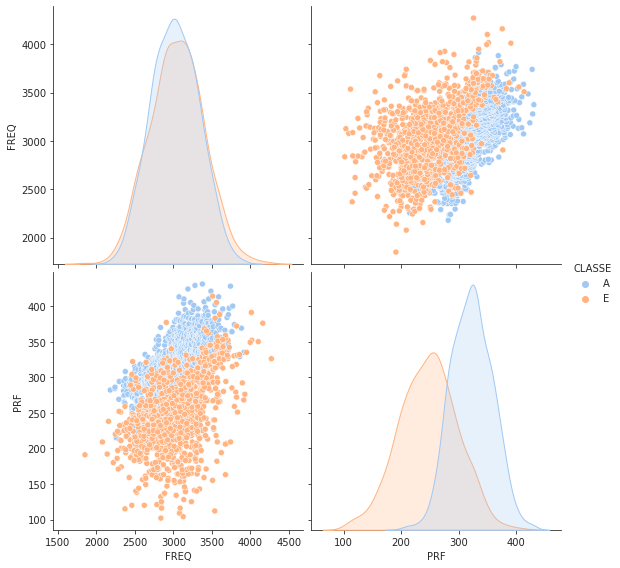

In [3]:
#Análise Gráfica
sns.set_style("ticks")

sns.pairplot(data, hue="CLASSE", diag_kind='kde', kind="scatter",palette="pastel", size=4)
       
plt.show()

Observado o histograma da variável PRF é possível perceber que os dados apresentam previsibilidade pela distância entre suas médias e como o *Scatter plot* pode-se verificar regiões de classificação.

## Construção do Modelo
Nesta etapa os dados serão divididos em treino e teste, respeitando uma proporção de 70/30, respectivamente. Em seguida, os dados de treino serão modelados pelos dois algoritimo em 10 Folds (Cross-Validation), e o modelo que obtiver a maior acurácia média, ou seja, aquele que apresentar a melhor performance geral em relação a quantidade de amostras classificadas corretamente, será selecionado para validação.

Outra facilidade dos modelos de classificação baseados em NB e QDA é que eles não precisam de padronização e nem normalização dos dados.

In [9]:
# Tornando os dados binário
data.CLASSE = data.CLASSE.map({'E':0,'A':1})

# Dividindo dados em treino e teste
from sklearn.model_selection import train_test_split

X = data.drop("CLASSE",axis=1)
y = data.CLASSE

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=365)

print('Treino:',X_train.shape)
print('Teste:',X_test.shape)

Treino: (1400, 2)
Teste: (600, 2)


In [10]:
# Importando K-Fold e Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Importando diversos modelos
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [11]:
# 10 Foldes 
kf = KFold(n_splits=10, random_state=365, shuffle=True)

#Aplicando modelos
for model in [QuadraticDiscriminantAnalysis,
              GaussianNB]:

  cls = model()
  try:
    a = cross_val_score(cls, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)

    print(
      f"{model.__name__:22} Accuracy: {a.mean():.3f} STD: {a.std():.3f}"
  )
  except ValueError:
    pass

QuadraticDiscriminantAnalysis Accuracy: 0.883 STD: 0.025
GaussianNB             Accuracy: 0.804 STD: 0.031


Verifica-se que, utilizando a acurácia como métrica, o classificador QDA obteve uma melhor performance em relação ao NB.

Entendendo os conceitos de ambos os classificadores é possível entender o por que da performance do QDA ser melhor para esse conjunto de dados. Apesar dos dois classificadores serem paramétricos, somente o QDA leva em consideração a covariância, o que permite que as bordas do limite de decisão ganhe inclinação de forma a se adequar melhor aos dados.

Esse conceito pode ser observado nas figuras abaixo:


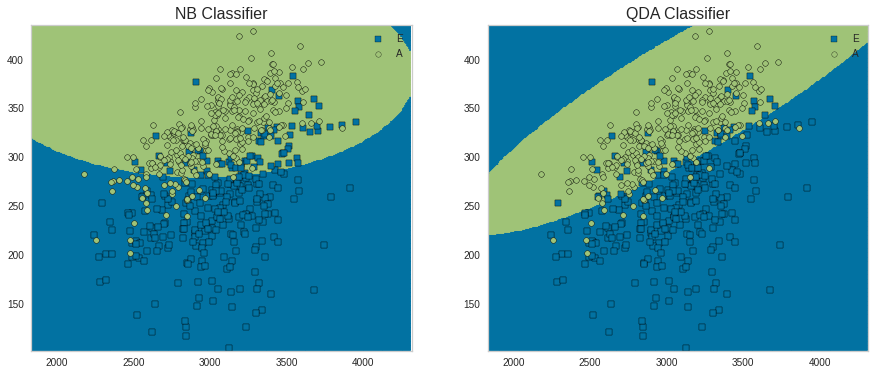

In [ ]:
#Visualizando bordas de decisão
from yellowbrick.contrib.classifier import DecisionViz

fig, ax = plt.subplots(1,2, figsize=(15,6))

#NB
viz = DecisionViz(
    GaussianNB(), title="GaussianNB",
    features=['FREQ', 'PRF'], classes=['E', 'A'],
    ax=ax[0]
)
viz.fit(np.array(X_train), np.array(y_train))
viz.draw(np.array(X_test), np.array(y_test))

#QDA
viz = DecisionViz(
    QuadraticDiscriminantAnalysis(), title="QuadraticDiscriminantAnalysis",
    features=['FREQ', 'PRF'], classes=['E', 'A'],
    ax=ax[1]
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)

ax[0].legend()
ax[0].set_title("NB Classifier",fontsize=16)
ax[1].legend()
ax[1].set_title("QDA Classifier",fontsize=16)
plt.show()

## Validação
Após selecionar a Análise Discriminante Quadrática como o melhor modelo, agora será validado a sua performance frente aos dados de teste.

In [12]:
# Modelagem com QDA
model_QDA = QuadraticDiscriminantAnalysis()
model_QDA.fit(X_train,y_train)
y_pred = model_QDA.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           E     0.9134    0.8846    0.8988       286
           A     0.8978    0.9236    0.9105       314

    accuracy                         0.9050       600
   macro avg     0.9056    0.9041    0.9046       600
weighted avg     0.9052    0.9050    0.9049       600



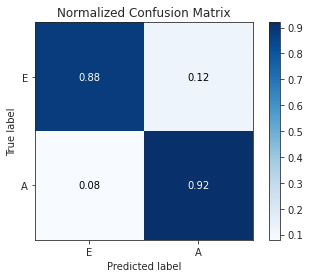

In [27]:
# Criando uma matriz de confusão
# !pip install scikit-plot -q
import scikitplot as skplt
from sklearn.metrics import classification_report

fig, ax = plt.subplots()
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True,ax=ax)
ax.xaxis.set_ticklabels(['E', 'A']); ax.yaxis.set_ticklabels(['E', 'A']);

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4, target_names=['E','A']))

O modelo apresentou um acurácia de 90% ao classificar as emissões eletromagnéticas e uma precisão capaz de identificar 92% das emissões provenientes de sistemas de Defesa Aérea, deixando passar 8% de ameaças iminentes que deveriam ser neutralizadas.

Uma forma de melhor a precisão seria diminuir o critério de classificação (*default* 50%), ajudando a identificar as emissões duvidosas, ou seja, aquelas que estão próximas de 50% de probabilidade de serem uma ameaça.

Relatório de Classificação:
               precision    recall  f1-score   support

           E     0.9502    0.8671    0.9068       286
           A     0.8879    0.9586    0.9219       314

    accuracy                         0.9150       600
   macro avg     0.9190    0.9129    0.9143       600
weighted avg     0.9176    0.9150    0.9147       600



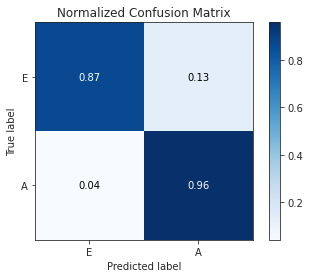

In [38]:
#Mudando o critério de classificação
y_prob=[]
for y in model_QDA.predict_proba(X_test):
  if y[1]>0.40:
    y_prob.append(1)
  else:
    y_prob.append(0)

# Criando nova matriz de confusão
fig, ax = plt.subplots()
skplt.metrics.plot_confusion_matrix(y_test, y_prob, normalize=True, ax=ax)
ax.xaxis.set_ticklabels(['E', 'A']); ax.yaxis.set_ticklabels(['E', 'A']);

print("Relatório de Classificação:\n", classification_report(y_test, y_prob, digits=4,target_names=['E','A'] ))

Alterando o critério de classificação para "A", quando uma EM estiver acima de 40% de probabilidade de ser proveniente de um sistema de Defesa Aérea, obtém-se 96% de precisão e um baixo *trade-off* com os falsos positivos, que aumentaram em 1%, totalizando 13%.

#Conclusão

É possível verificar que a ciência de dados está cada vez mais presente na guerra moderna. Saber que o sistema tem 96% de precisão em identificar ameaças e 13% de falsos positivos pode ser uma informação primordial para os comandantes definirem a quantidade de aeronaves e de armamento a serem empregados, de forma a tornar possível a garantia do sucesso da missão.

Neste artigo foi possível entender o funcionamento prático de dois classificadores baysianos paramétricos que possuem boa performace, apesar da sua simplicidade.

Desta forma, fica a curiosidade: quais são as capacidades de precisão do sistema de inteligência artificial do Kalætron Attack? Será que o sistema apresenta valores altos de falsos positivos em prol de uma precisão maior?

#Referências

Defense Brief Editorial. **Germany's Hensoldt unveils new AI-based electronic warfare jammer**. 2020.

RISH, Irina et al. **An empirical study of the naive Bayes classifier. In: IJCAI 2001 workshop on empirical methods in artificial intelligence**. 2001. p. 41–46.

THARWAT, Alaa. **Linear vs. quadratic discriminant analysis classifier: a tutorial**. International Journal of Applied Pattern Recognition, v. 3, n. 2, p. 145–180, 2016.